# Simple Linear Regression with Synthetic Data

In this first Colab, you'll explore linear regression with a simple database.

## import necessary modules

In [26]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds an empty model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass.

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the headline to explore this code.

In [5]:
def build_model(my_learning_rate):
  # ceate and compile simple linear regression models
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # adding lr, loss function and optimizer
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss=(tf.keras.losses.mean_squared_error),
                metrics=(tf.keras.metrics.RootMeanSquaredError()))
  return model

In [36]:
def train_model(model, feature, label, epochs, batch_sizes):
  # train the model by feeding the data
  model_history = model.fit(x= feature,
                            y= label,
                            batch_size=batch_sizes,
                            epochs=epochs)
  weights, bias = model.get_weights()[:2]
  epochs = model_history.epoch
  hist = pd.DataFrame(model_history.history) # details of full training
  rmse = hist['root_mean_squared_error']
  return weights, bias, epochs, rmse


## Define plotting functions

We're using a popular Python library called [Matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) to create the following two plots:

*  a plot of the feature values vs. the label values, and a line showing the output of the trained model.
*  a [loss curve](https://developers.google.com/machine-learning/glossary/#loss_curve).



In [30]:
def plot_model(weights, bias, feature, label):
  plt.xlabel('feature')
  plt.ylabel('label')

  # plot feature vs label in scatter
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # (x0, y0) and pass(x1,y1)
  x0 = 0
  y0 = bias
  x1 = feature[-1]
  y1 = bias+ weights*x1
  plt.plot([x0,x1],[y0,y1], c='r')
  plt.show()

In [31]:
# plot loss curve
def plot_the_loss_curve(epochs, rmse):
  plt.figure()
  plt.xlabel('epoch')
  plt.ylabel('RMSE')

  plt.plot(epochs, rmse, label='loss', c='b')
  plt.legend()
  plt.ylim(rmse.min()*0.97, rmse.max())
  plt.show()

## Define synthetic dataset

In [32]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

## Training ans hyper parameter tuning



Epoch 1/60
2/2 [==============================] - 0s 8ms/step - loss: 401.3640 - root_mean_squared_error: 20.0341
Epoch 2/60
2/2 [==============================] - 0s 7ms/step - loss: 331.6877 - root_mean_squared_error: 18.2123
Epoch 3/60
2/2 [==============================] - 0s 7ms/step - loss: 283.4593 - root_mean_squared_error: 16.8362
Epoch 4/60
2/2 [==============================] - 0s 8ms/step - loss: 245.8558 - root_mean_squared_error: 15.6798
Epoch 5/60
2/2 [==============================] - 0s 16ms/step - loss: 216.2062 - root_mean_squared_error: 14.7040
Epoch 6/60
2/2 [==============================] - 0s 8ms/step - loss: 190.4720 - root_mean_squared_error: 13.8012
Epoch 7/60
2/2 [==============================] - 0s 8ms/step - loss: 167.8917 - root_mean_squared_error: 12.9573
Epoch 8/60
2/2 [==============================] - 0s 8ms/step - loss: 148.0768 - root_mean_squared_error: 12.1687
Epoch 9/60
2/2 [==============================] - 0s 10ms/step - loss: 130.3389 - root_

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


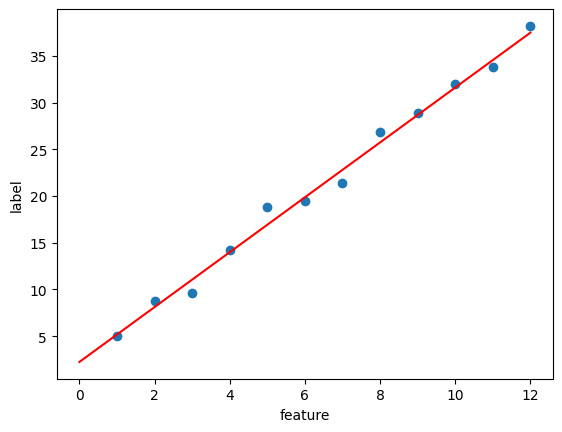

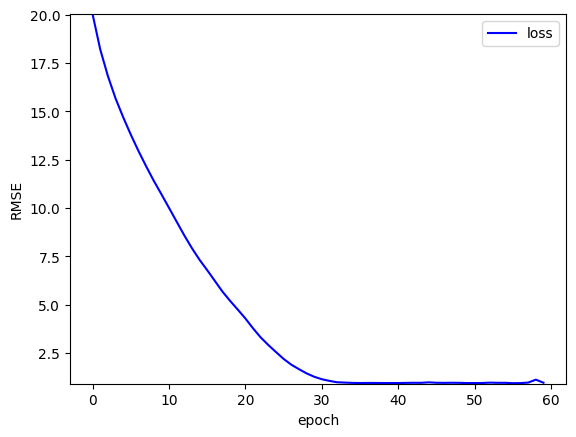

In [38]:
lr = 0.05
ep = 60
bs = 8

my_model = build_model(lr)

weight, bias, epochs, rmse = train_model(my_model, my_feature, my_label,
                                         ep, bs)

plot_model(weight, bias, my_feature, my_label)

plot_the_loss_curve(epochs, rmse)

## Modehel saving for infernece
now model is prepared well
we need to infernce the model from after load the model.


In [39]:
my_model.save('leniar_regressor.keras')

In [42]:
# Load model and testing
infer_model = tf.keras.models.load_model('leniar_regressor.keras')

x_test = ([3.0,  4.0,  5.0])
y_test = ([9.6, 14.2, 18.8])

test = infer_model.evaluate(x = x_test, y = y_test, batch_size=bs)

1/1 [==============================] - 1s 934ms/step - loss: 1.8909 - root_mean_squared_error: 1.3751


1/1 [==============================] - 0s 43ms/step
[[11.053143]
 [13.988956]
 [16.92477 ]]


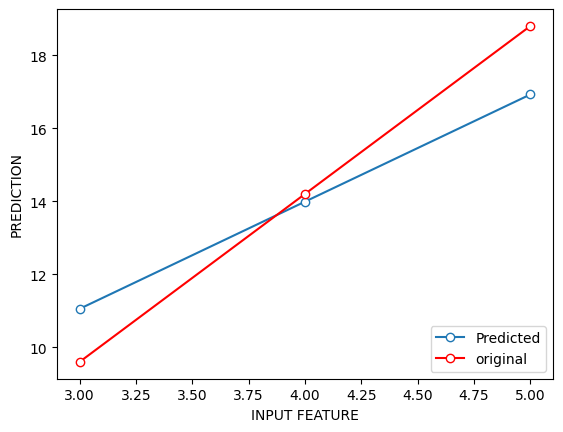

In [56]:
# testing and plotiing

results = infer_model.predict(x_test)
print(results)

plt.figure()
plt.ylabel('PREDICTION')
plt.xlabel('INPUT FEATURE')

plt.plot(x_test,results, label='predicted',marker = 'o', markerfacecolor = 'w')
plt.plot(x_test, y_test, c='r', label='ground truth', marker = 'o', markerfacecolor = 'w')
plt.legend(["Predicted", "original"], loc ="lower right")
plt.show()

## Summary of hyperparameter tuning

Most machine learning problems require a lot of hyperparameter tuning.  Unfortunately, we can't provide concrete tuning rules for every model. Lowering the learning rate can help one model converge efficiently but make another model converge much too slowly.  You must experiment to find the best set of hyperparameters for your dataset. That said, here are a few rules of thumb:

 * Training loss should steadily decrease, steeply at first, and then more slowly until the slope of the curve reaches or approaches zero.
 * If the training loss does not converge, train for more epochs.
 * If the training loss decreases too slowly, increase the learning rate. Note that setting the learning rate too high may also prevent training loss from converging.
 * If the training loss varies wildly (that is, the training loss jumps around), decrease the learning rate.
 * Lowering the learning rate while increasing the number of epochs or the batch size is often a good combination.
 * Setting the batch size to a *very* small batch number can also cause instability. First, try large batch size values. Then, decrease the batch size until you see degradation.
 * For real-world datasets consisting of a very large number of examples, the entire dataset might not fit into memory. In such cases, you'll need to reduce the batch size to enable a batch to fit into memory.

Remember: the ideal combination of hyperparameters is data dependent, so you must always experiment and verify.